# CS167: Day15
## Dimensionality Reduction

#### CS167: Machine Learning, Spring 2023

Thursday, March 23rd, 2023

📆 [Course Schedule](https://docs.google.com/spreadsheets/d/e/2PACX-1vSvFV5Mz0_YZE1d5r3gQ8IMktE4cBAsJIlP30cl2GhEpSO0J-YWV62QokSDz-OcOCsEmxMuKpY0kVlR/pubhtml?gid=0&single=true) | 🙋[PollEverywhere](https://pollev.com/meredithmoore011) | 📜 [Syllabus](https://analytics.drake.edu/~moore/cs167_s23_syllabus.html) | 📬 [CodePost Login](https://codepost.io/login)

# Admin Stuff

You should be working on:
- [Project #1](https://classroom.github.com/a/qGx9Wonm) id  **due tonight, Thursday, March 23rd, by 11:59pm**.

Grading:
- Midterm grades are posted--just an estimate

# Quick Review:

## Dimensionality of Data

__Dimensionality__: the number of attributes that a dataset has

- __High dimensionality__: If the number of attributes (i.e. columns) is higher than the number of observations (i.e. rows) the dimensionality of the data is very high (i.e. *healthcare data*, *gene expression*, 
    - Pros: more data provides more attributes to 'learn' from
    - Cons: more compute time

- __Low dimensionality__: if the number of attributes (i.e. columns) is relatively small compared to the number of rows. (i.e. *Iris Dataset*)
    - Pros: simpler data, less compute time
    - Cons: less likely to be easily separable

## 🔮 Curse of Dimensionality:

The __curse of dimensionality__: the more dimensions you add to a dataset, the more difficult it becomes to make predictions about that dataset. 
- each attribute added results an an _exponenetial decrease in predictive power_. 

# Overview:

The next two lectures, we're going to be playing around with the __dimensionality__ of our datasets. 
- __Support Vector Machines__: increase dimensionality so that our data can be linearly separable
- __Principal Component Analysis__: Decreases the dimensionality of our datasets

# Support Vector Machine Review

Things to remember about SVMs:

- __supervised__ machine learning model 

- can be used for __classification__ or __regression__

- goal is to find the decision a boundary (point/line/plane/hyperplane) 
<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day14_hyperplane.png?raw=1" width=800/>
</div>

# Support Vector Machine Review

Things to remember about SVMs:

- often there are many possible decision boundaries, but SVMs will select the decision boundary that __maximizes the margins__.
<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day15_svm_summary.png?raw=1" width=400/>
</div>

# Support Vector Machine Review

Things to remember about SVMs:

- if data is not lineraly separable, SVMs employ the __kernel trick__. 
    - __kernel trick__: A combination of existing columns is added as a new dimension with the goal of mapping the data to a higher dimensional space where we can find a hyperplane that separates the classes.

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day14_kernel.png?raw=1" width=500/>
</div>

## 🙋 PollEverywhere Review Q

# ✨ New Material

# Dimensionality Reduction:

When working with datasets that have many variables (i.e. columns), it is often advantageous to "reduce the dimension of your feature space"-- or in other words, focus on a smaller subset of the most important variables.

Reducing the dimension  of the feature space is called __dimensionality reduction__. 

- visualize high-dimensional data in 2D or 3D
- Reduce noise
- Better/faster learning - removing irrelevant features

## Dimensionality Reduction Techniques:
1. __Feature Selection/Elimination__: choose which features are important
2. __Feature Extraction__: transforming raw data into numeric feaures that can be processed while preserving the information in the original dataset

# 1. Feature Selection/Elimination:

__Big Idea__: Choose only the important existing features, and use those for classification or regression. 

## 💬 Group Discussion:

See if you and your group can come up with some ways to tell how important a variable (i.e. column) is for making a machine learning prediction.

Ideas:
- Try machine learning with one column at a time... pick the columns that give you the best performance.
- Build a decision tree or Random Forest and look at the `feature_importances_` attribute (which is built from __information gain__).
- Statistical tests: chi squared, F-value, etc.

## Advantages of Feature Selection/Elimination:

- Simplicity--easily interpretable
- maintaining the interpretability of your variables (in comparison to feature extraction)

## Disadvantages of Feature Selection/Elimination:

- you lose data by dropping columns

## Feature Selection Code:

Documentation: [`sklearn.feature_selection.SelectKBest()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)

In [2]:
import pandas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/CS167-Machine_Learning/datasets/irisData.csv'
data = pandas.read_csv(path)
predictors = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = "species"

train_data, test_data, train_sln, test_sln = \
    train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)

# fit your selector just like you do when training with a classifier/regressor
# only do this after splitting into train and test sets - don't let the test
# set spoil your predictions
selector = SelectKBest(k=2)
selector.fit(train_data,train_sln)

# bigger number means the feature is more important
print('Here are the scores of each feature:')
print(selector.scores_)
print(predictors)

Here are the scores of each feature:
[ 83.17181699  48.65999233 962.36229917 894.63459428]
['sepal length', 'sepal width', 'petal length', 'petal width']


In [5]:
#transforming the predictor columns of the training set
train_transformed = selector.transform(train_data)

print("Here's what the training predictors look like after the transformation. \
Notice that it's just the last two columns from the original data.")
train_transformed[0:6]

Here's what the training predictors look like after the transformation. Notice that it's just the last two columns from the original data.


array([[3.5, 1. ],
       [4.6, 1.5],
       [4.5, 1.7],
       [4.4, 1.2],
       [5.2, 2.3],
       [1.2, 0.2]])

In [6]:
#take a look at the training data
train_data[0:6]

,sepal length,sepal width,petal length,petal width
79,5.7,2.6,3.5,1.0
54,6.5,2.8,4.6,1.5
106,4.9,2.5,4.5,1.7
90,5.5,2.6,4.4,1.2
145,6.7,3.0,5.2,2.3
14,5.8,4.0,1.2,0.2


In [7]:
#Now we transform the predictor columns in the test set as well.
#Notice that we're using the selector that we trained using the training set.
#Do not re-fit it to the test data. 
test_transformed = selector.transform(test_data)

#Now we can use our transformed data with a classifier just like always:
clf = KNeighborsClassifier()
clf.fit(train_transformed,train_sln)
predictions = clf.predict(test_transformed)
print('Accuracy:',accuracy_score(test_sln,predictions))

Accuracy: 0.9333333333333333


Let's compare it to a model trained on all of the data:

In [8]:
clf = KNeighborsClassifier()
clf.fit(train_data,train_sln)
predictions = clf.predict(test_data)
print('Accuracy:',accuracy_score(test_sln,predictions))

Accuracy: 0.9666666666666667


## Feature Selection Code (all together)

In [9]:
#load data first

# create an instance of 'SelectKBest'
selector = SelectKBest(k=2)

# fit it on your train data and solutions
selector.fit(train_data,train_sln)

# transform your traning data to only have the k best attributes
train_transformed = selector.transform(train_data)

#build a model
clf = KNeighborsClassifier()
clf.fit(train_transformed,train_sln)
predictions = clf.predict(test_transformed)
print('Accuracy:',accuracy_score(test_sln,predictions))

Accuracy: 0.9333333333333333


# 💬 Group Exercise:

Let's give it a shot:
- below, I went ahead and loaded in the penguin dataset 🐧
- Using `species` as the target variable, what are the 3 best attributes?
- Build a default Random Forest using only the 3 best attributes. How does the performance compare to a default random forest that uses all of the predictor variables?

In [10]:
path = '/content/drive/MyDrive/CS167-Machine_Learning/datasets/penguins_size.csv'
data = pandas.read_csv(path)

# data prep: dummies, replace, and drop missing data
data = pandas.get_dummies(data, columns=['island'])
data.sex.replace('MALE', 0, inplace=True)
data.sex.replace('FEMALE', 1, inplace=True)
data.sex.replace('.', 1, inplace=True)
data.dropna(inplace=True)
data.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,0.0,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,1.0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,1.0,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,1.0,0,0,1
5,Adelie,39.3,20.6,190.0,3650.0,0.0,0,0,1


In [11]:
target = "species"
predictors = data.columns.drop(target)

train_data, test_data, train_sln, test_sln = \
    train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
train_data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
343,49.9,16.1,213.0,5400.0,0.0,1,0,0
302,47.4,14.6,212.0,4725.0,1.0,1,0,0
4,36.7,19.3,193.0,3450.0,1.0,0,0,1
179,49.5,19.0,200.0,3800.0,0.0,0,1,0
262,45.3,13.7,210.0,4300.0,1.0,1,0,0


In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(train_data,train_sln)
predictions = rf.predict(test_data)
print('Accuracy:',accuracy_score(test_sln,predictions))

Accuracy: 1.0


In [13]:
# your code here

#find the 3 best attributes

selector = SelectKBest(k=3)
selector.fit(train_data,train_sln)

print('Here are the scores of each feature:')
print(selector.scores_)
print(predictors)

train_transformed = selector.transform(train_data)
test_transformed = selector.transform(test_data)

# build a default random forest using this subset
srf = RandomForestClassifier()
srf.fit(train_transformed,train_sln)
predictions = srf.predict(test_transformed)
print('Accuracy:',accuracy_score(test_sln,predictions))


Here are the scores of each feature:
[3.22186902e+02 2.67492793e+02 4.71351235e+02 2.92007977e+02
 9.96168270e-02 2.26584411e+02 1.67166819e+02 3.29588015e+01]
Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex', 'island_Biscoe', 'island_Dream',
       'island_Torgersen'],
      dtype='object')
Accuracy: 0.9253731343283582


# 2. Feature Extraction:

If you are working with high dimensional data, it is often advantageous to do some __feature extraction__ before building and testing your machine learning models. 

__Feature extraction__ takes the existing (usually high dimensional) dataset, and returns a dataset such that there are new columns of data that are ordered from most important to least important. 

__Big Idea__: Find new or _latent_ features made up of combinations of existing features.

Example: 
- Maybe multiplying `sepal length * petal width` is more helpful in identyfing the species of an iris than either `sepal length` or `petal width` are on their own.

## Measurable v Latent Features

__Example__: 🏡🏷

Imagine we are attempting to predict the price of a house based on the following measurable features:
- house square footage
- number of rooms
- school district test scores
- neighborhood crime rates

### 💬 Group Discussion:
__claim__: In the 4 _measurable features_ above, there are really only __two latent features__ which explain these four measurable features. In other words, there are two composite features that more directly probe the underlying phenomenon of the data.

Can you see the pattern and guess what these __two latent features__ are?

## Example: Measurable v Latent Features:

Size of house:
- house square footage
- number of rooms

Location of house:
- school district test scores
- neighborhood crime rate

# Principal Component Analysis (PCA)

Principal Component Analysis is an __unsupervised__ algorithm as it doesn't use a target column. 
- PCA is a __feature extraction__ technique
- PCA is a __preprocessing__ technique (something that you do during data prep, before building/running your model).

__Big Idea__: Can we extract information from the data that might prove to be more useful?
- reduce dimensions of inputs to learning algorithms
- easier to understand and graph
- reduce noise

## 🙋 PollEverywhere 

## High-Level Overview of PCA:

Calculating PCA requires a relatively deep background in linear algebra--calculating the eigenvectors and their corresponding eigenvalues of covariance matrices. So... we're going to stick to a practical level of understanding.

https://setosa.io/ev/principal-component-analysis/

## Advantages of Feature Extraction (PCA):

- Minimal data loss
- Output is ordered by how well each component predicts the dependent variable.

## Disadvantages of Feature Extraction (PCA):

- data becomes much less interpretable

## When should I use PCA?

Ask yourself these questions:

1. Do you want to __reduce the number of variables__, but aren't able to identify variables to copmletely remove from consideration?

2. Do you want to ensure your variables are __independent of one another__?
    - __independence__: variables are independent if and only if the occurrence of one does not affect the probability of the occurence of the other.

3. Are you comfortable making your independent variables __less interpretable__?

If the answers to the above questions are yes, then doing a PCA on your data before you build/run your model is probably a good idea.

## PCA Code:
Documentation: [`sklearn.decomposition.PCA()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [15]:
import pandas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

#load data
path = '/content/drive/MyDrive/CS167-Machine_Learning/datasets/irisData.csv'
data = pandas.read_csv(path)
predictors = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = "species"

train_data, test_data, train_sln, test_sln = \
    train_test_split(data[predictors], data[target], test_size = 0.2, random_state=1)

#whiten = True is important for uncorrelated
#attributes, and is False by default
extractor = PCA(n_components=2, whiten=True)
#When fitting with PCA, you do not use the target column - this is an unsupervised learning algorithm
extractor.fit(train_data)

print('this is the variance/importance of each component')
print(extractor.explained_variance_ratio_)

this is the variance/importance of each component
[0.92859758 0.0474831 ]


In [16]:
print("Here's what the data looks like before being transformed:")
train_data[0:4]

Here's what the data looks like before being transformed:


,sepal length,sepal width,petal length,petal width
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1


In [17]:
train_transformed = extractor.transform(train_data)

print("Here's what the training predictors look like after the transformation.")
train_transformed[0:4]

Here's what the training predictors look like after the transformation.


array([[ 0.40446601,  0.00616923],
       [ 1.46396527,  1.48755977],
       [-0.00791473, -1.15083283],
       [ 1.00017476, -0.4027048 ]])

In [18]:
#Now we transform the predictor columns in the test set as well.
#Notice that we're using the extractor that we trained using the training set.
#Do not re-fit it to the test data. 
test_transformed = extractor.transform(test_data)

#Now we can use our transformed data with a classifier just like always:
clf = KNeighborsClassifier()
clf.fit(train_transformed,train_sln)
predictions = clf.predict(test_transformed)
print('Accuracy:',accuracy_score(test_sln,predictions))

Accuracy: 0.9


In [19]:
print('Here are the two vectors (in the original space) that define our 2 new axes:')
print(extractor.components_[0])
print(extractor.components_[1])

Here are the two vectors (in the original space) that define our 2 new axes:
[ 0.36473622 -0.07245354  0.85441261  0.36290089]
[ 0.64892255  0.73464162 -0.17722287 -0.08827952]


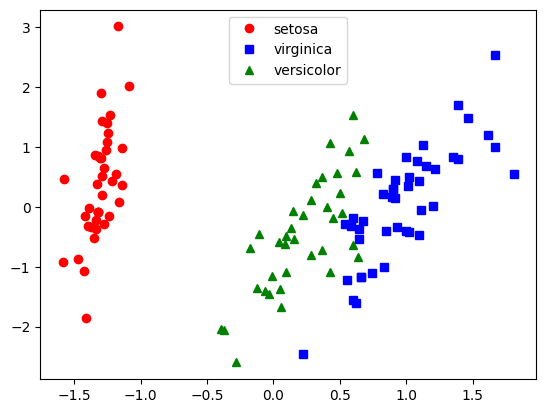

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

#visualizing the new axes
#PCA gives it back as numpy array
tdf = pandas.DataFrame(train_transformed)
#next line: probably not the best way
tdf['species'] = pandas.Series(list(train_sln)) 


setosa_series = tdf[ tdf['species'] == 'Iris-setosa' ]
virginica_series = tdf[ tdf['species'] == 'Iris-virginica' ]
versicolor_series = tdf[ tdf['species'] == 'Iris-versicolor']

plt.plot(setosa_series[0],setosa_series[1],'ro',label='setosa')
plt.plot(virginica_series[0],virginica_series[1],'bs',label='virginica')
plt.plot(versicolor_series[0],versicolor_series[1],'g^',label='versicolor')
plt.legend(loc='upper center')
plt.show()

# PCA Code (all together)

In [21]:
from sklearn.decomposition import PCA

# build your PCA extractor, decide how many output components (columns) you'd like
extractor = PCA(n_components=2, whiten=True)

#When fitting with PCA, you do not use the target column - this is an unsupervised learning algorithm
extractor.fit(train_data)

# transform your train_data and _test_data
train_transformed = extractor.transform(train_data)
test_transformed = extractor.transform(test_data)

#build and test your model
clf = KNeighborsClassifier()
clf.fit(train_transformed,train_sln)
predictions = clf.predict(test_transformed)
print('Accuracy:',accuracy_score(test_sln,predictions))

Accuracy: 0.9


# 💬 Group Programming Exercise:

1. Input the boston housing dataset (download from Blackboard datasets)
    - `MEDV` is our target variable, the median home value in $10000s
2. Run a Support Vector Regressor ([`sklearn.svm.SVR`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)) to get a baseline to compare to.
3. Output the R2 score for your baseline SVR
4. Use PCA to reduce the dimensions to 2
5. Run a SVR on your transformed data
6. Output the R2 score for your dimensionality reduced data.
7. Play around... see what you can change (the number of dimensions, gamma, C, etc), to improve your R2 score. Use the sklearn documentation if you're unsure what these will do.
8. Be ready to discuss what combination gave you the best R2 score when we come back to the whole class.

In [22]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn import metrics


# load data
path = 'datasets/boston_housing.csv' #'/content/drive/MyDrive/CS167/datasets/boston_housing.csv'
housing_data = pandas.read_csv(path)

# clean the data
housing_data['CRIM'].fillna(housing_data['CRIM'].mean(),inplace=True)
housing_data['ZN'].fillna(housing_data['ZN'].mean(),inplace=True)
housing_data['INDUS'].fillna(housing_data['INDUS'].mean(),inplace=True)
housing_data['CHAS'].fillna(housing_data['CHAS'].mean(),inplace=True)
housing_data['AGE'].fillna(housing_data['AGE'].mean(),inplace=True)
housing_data['LSTAT'].fillna(housing_data['LSTAT'].mean(),inplace=True)

# Split the data into the training data and testing data
target= 'MEDV'
predictors = housing_data.columns.drop(target) # use all of the columns except for MEDV
train_data, test_data, train_sln, test_sln = train_test_split(housing_data[predictors], housing_data[target], test_size = 0.2, random_state=41)

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

FileNotFoundError: ignored

In [ ]:
# your code here

## 🙋 PollEverywhere 